In [113]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [188]:
%load_ext autoreload
%autoreload 2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
import scikitplot as skplt
from sklearn.decomposition import PCA
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler 
from sklearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
import util

% matplotlib inline
plt.style.use("ggplot")

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Assumptions

### Exploratory Data Analysis

In [115]:
#Loading data 
df = pd.read_csv("../../../downloads/class_exercise_01/exercise_01_train.csv")

In [116]:
df.head()

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x91,x92,x93,x94,x95,x96,x97,x98,x99,y
0,10.142889,-15.675620,3.583176,-22.397489,27.221894,-34.110924,-0.072829,-0.544444,0.997601,-2.691778,...,1.916575,5.240820,euorpe,2.431170,0.454074,-18.572032,-14.291524,0.178579,18.110170,0
1,-52.214630,5.847135,-10.902843,-14.132351,20.588574,36.107322,0.115023,0.276093,-0.699168,-0.972708,...,0.370941,-3.794542,asia,2.592326,31.921833,3.317139,10.037003,-1.930870,-3.486898,0
2,67.718500,2.064334,12.394186,-18.667102,47.465504,-50.373658,0.253707,1.068968,2.939713,2.691218,...,1.449817,12.470532,asia,7.143821,9.401490,-10.604968,7.643215,-0.842198,-79.358236,0
3,-28.003111,8.565128,-8.592092,5.918960,-3.224154,78.315783,-0.879845,1.176889,-2.414752,0.589646,...,-3.274733,3.484450,asia,-4.998195,-20.312810,14.818524,-9.180674,1.356972,14.475681,0
4,80.703016,30.736353,-30.101857,-21.201140,-91.946233,-47.469246,-0.646831,-0.578398,0.980849,-1.426112,...,-0.644261,4.082783,asia,-0.012556,-29.334324,1.734433,-12.262072,-0.043228,-19.003881,0


In [117]:
df.tail()

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x91,x92,x93,x94,x95,x96,x97,x98,x99,y
39995,20.844737,-33.785846,-0.346804,-3.406866,34.771517,-57.951056,-0.288205,1.371940,3.335447,1.765670,...,-2.985304,7.312132,asia,5.964857,-13.061671,-8.062604,16.618593,-3.609543,0.631066,0
39996,1.666154,16.241028,12.623090,-6.168540,-10.650748,69.840299,-0.965011,-4.321631,3.071324,-0.209940,...,-5.842786,3.563600,asia,4.895863,-1.342384,-10.275539,14.046990,-0.320440,46.051387,0
39997,1.795836,-15.706685,1.009672,-0.887671,-11.580529,3.237055,0.541397,2.562310,-0.623586,3.300388,...,7.503255,-11.064043,america,6.783607,15.293008,-6.194035,-4.725605,-1.321478,27.836630,0
39998,50.168318,-4.272643,2.409248,-11.697615,39.234827,31.353302,1.416008,1.825775,2.027886,-3.753114,...,-1.411384,-17.587621,america,6.278226,-18.743967,-8.067506,5.258203,-2.623772,-15.550075,0
39999,-8.653274,10.572796,1.377445,-21.472814,-42.686853,28.893360,3.379456,-1.241659,-0.040278,0.612898,...,7.622624,-6.473851,asia,0.055730,-6.506186,12.434701,-6.001283,-5.340633,18.276723,1


In [118]:
print("Number of columns: {} \nNumber of rows: {}".format(df.shape[1], df.shape[0]))

Number of columns: 101 
Number of rows: 40000


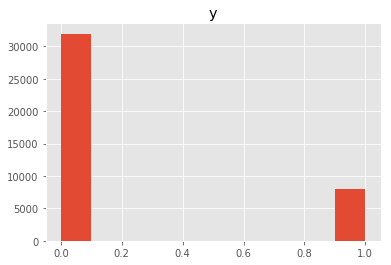

In [119]:
# Lets see the distribution of the label
df.hist(column="y")
plt.show()

In [120]:
categorical_cols = util.non_numerical_col(df)

## First iteration of model

In [121]:
df_num = df.copy()

In [122]:
# To start simple with the numerical portion of the data and removing all nans

In [123]:
df_num.dropna(inplace=True)
df_num.shape

(39199, 101)

In [124]:
print("{}% of the data is lost".format(round((df.shape[0]-df_num.shape[0])/df.shape[0]*100, 2)))

2.0% of the data is lost


In [125]:
# Dropping non-numerical features
df_num.drop(columns=categorical_cols, inplace=True)
df_num.shape

(39199, 95)

In [126]:
# There is clearly a skew towards the negative zero class, and the minority class is the positive class one,
# now lets check to see if how much of imbalance the classes are

In [127]:
y_dict = Counter(df_num["y"])
print("The minority class make up {}% of the data"
      .format(round(y_dict[1]/df_num.shape[0] *100)))

print("The majority class make up {}% of the data"
      .format(round(y_dict[0]/df_num.shape[0] *100)))

The minority class make up 20% of the data
The majority class make up 80% of the data


In [128]:
# Preparing train and test data for building model

In [129]:
y = df_num.pop("y")
X = df_num.values

In [130]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

In [131]:
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)



/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [132]:
y_pred = rfc.predict(X_test)

In [133]:

precision, recall, accuracy, matrix = util.metric(y_test, y_pred)

In [134]:
# Confusion matrix
matrix

array([[ 616,   38],
       [1396, 7750]])

In [135]:

print("Recall: {}".format(round(recall,2)))
print("Precision: {}".format(round(precision,2)))

Recall: 0.31
Precision: 0.94


In [136]:
#predicted probabilities
scores = rfc.predict_proba(X_test)

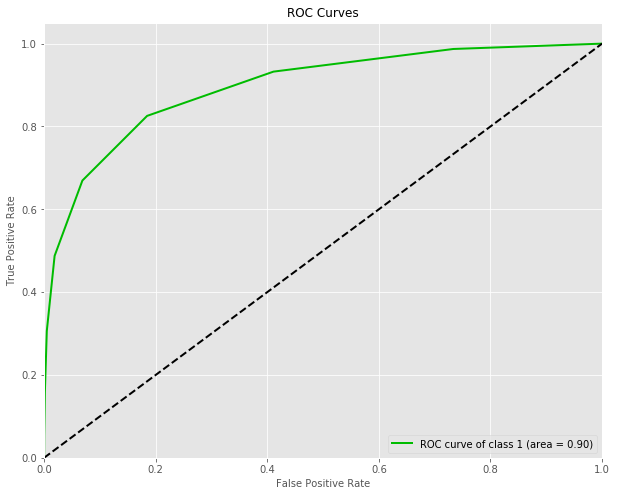

In [137]:
_=skplt.metrics.plot_roc(y_test, scores, 
                         classes_to_plot=[1], plot_micro=False, 
                         plot_macro=False, figsize=(10,8))

In [138]:
# The model is favoring more of the majority class label in its prediction, 
# this is an indication of an imbalance class problem. Since the positive class is only 20% of the data,
# it is reflected in the low recall

## Second iteration of model

In [139]:
# There are a few thins wrong with our model, one is imbalance classes, 
# the other is we might have lost some information that may be important in 
# our prediction by dropping the categorical features. Let us try to incoporate 
# these features back into the dataset

In [140]:
# Taking a look at the contents the dropped features
for col in categorical_cols:
    print(pd.unique(df[col]), "\n")

['bmw' 'nissan' 'Honda' 'Toyota' 'volkswagon' 'tesla' 'chrystler' 'ford'
 'mercades' nan 'chevrolet'] 

['wed' 'thur' 'thurday' 'wednesday' 'friday' 'tuesday' 'monday' 'fri' nan] 

['$-54.1' '$-229.32' '$243.68' ... '$1215.91' '$-723.78' '$-426.49'] 

['0.0%' '0.01%' '-0.01%' '0.02%' '-0.02%' '-0.0%' '-0.03%' '0.03%' '0.04%'
 '-0.04%' nan] 

['Jun' 'July' 'May' 'Aug' 'Apr' 'Mar' 'Oct' 'sept.' 'Nov' 'Feb' 'Dev' nan
 'January'] 

['euorpe' 'asia' 'america' nan] 



In [141]:
# Looking into the non-numeric attributes, these contain type of cars, days of the week, 
# dollar amount, percentage, month of the year, continent. Lets change the the dollar amount 
# and the percentage attributes to numerical values

In [142]:
util.regex(df, ["x41","x45"])

In [143]:
type(df["x45"][0])

numpy.float64

In [144]:
# Since there are few unique values in "x34", "x35", "x68" and "x93" it is a good idea to turn 
# them into dummy variables. But before doing that, observe that there are nan values. 
# Lets also see how much of the data is nan 

In [145]:
region = Counter(df["x93"])
cars = Counter(df["x34"])
days = Counter(df["x35"])
month = Counter(df["x68"])

In [146]:
print(region,"\n\n", cars,"\n\n", days,"\n\n", month)

Counter({'asia': 35409, 'america': 3136, 'euorpe': 1448, nan: 7}) 

 Counter({'volkswagon': 12572, 'Toyota': 10946, 'bmw': 7304, 'Honda': 5129, 'tesla': 2275, 'chrystler': 1223, 'nissan': 336, 'ford': 165, 'mercades': 32, 'chevrolet': 11, nan: 7}) 

 Counter({'wed': 14834, 'thurday': 13359, 'wednesday': 5891, 'thur': 4374, 'tuesday': 929, 'friday': 526, 'monday': 56, 'fri': 21, nan: 10}) 

 Counter({'July': 11088, 'Jun': 9279, 'Aug': 8155, 'May': 4788, 'sept.': 3466, 'Apr': 1641, 'Oct': 926, 'Mar': 409, 'Nov': 156, 'Feb': 54, 'Dev': 18, 'January': 11, nan: 9})


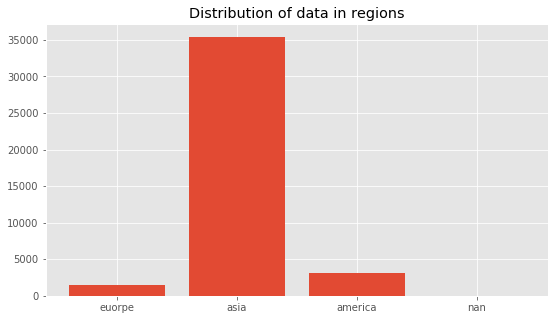

In [147]:
util.plot_cols(region, "regions")

In [148]:
print(region, "\n")
print("{}% of the data belong to asia category \n"
      .format(round(region["asia"]/sum(region.values())*100, 2)))
print("{}% of the data belong to asia category"
      .format(round(region["nan"]/sum(region.values())*100, 9)))

Counter({'asia': 35409, 'america': 3136, 'euorpe': 1448, nan: 7}) 

88.52% of the data belong to asia category 

0.0% of the data belong to asia category


In [149]:
# We can assume that the x93 is associated with three regions and a chunk of the the 
# category is asia (88.52%) with just 7 nan values and almost 0% of the data, this will 
# barely affect the model, it can be assummed to belong to the majority class 

In [150]:
# df["x93"][df["x93"].isna()] = "asia"

In [151]:
# Counter(df["x93"])

In [152]:
## Taking a look at the other three features

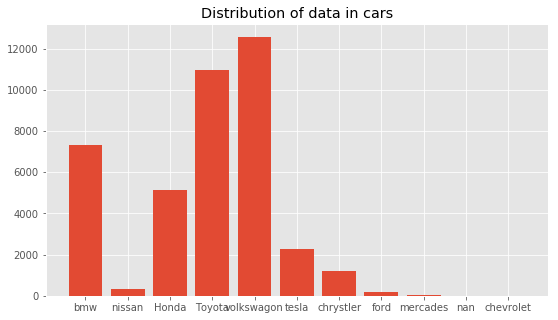

In [153]:
util.plot_cols(cars, "cars")

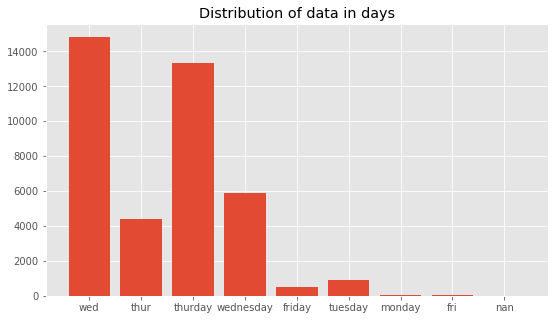

In [154]:
util.plot_cols(days, "days")

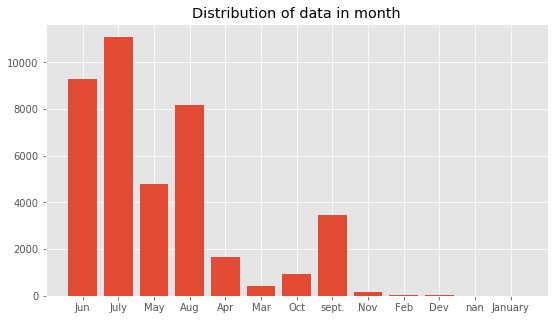

In [155]:
util.plot_cols(month, "month")

In [156]:
# Notice that in two of the plots, month and days there are duplicates in categories, 
# there are double entries of the month of january (as jun and January) and double entries 
# for wednesday/fiday as (wed and wednesday also fri and friday) as well as misspelling in thursday. 
# These categories will be merged as a single unique category. There are also mixed naming formats 
# used in days attribute (ie short and full) these will be changed for uniformity 

In [158]:
util.restructure_cols(df)

In [159]:
pd.unique(df["x35"])

array(['wed', 'thur', 'fri', 'tue', 'mon', nan], dtype=object)

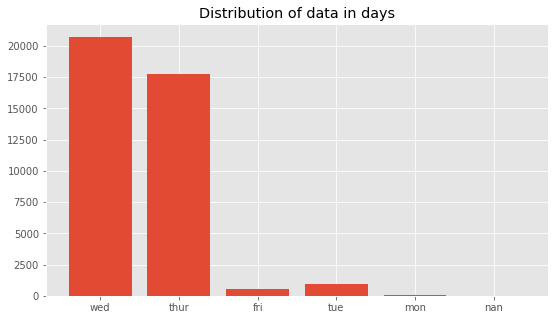

In [160]:
util.plot_cols(Counter(df["x35"]), "days")

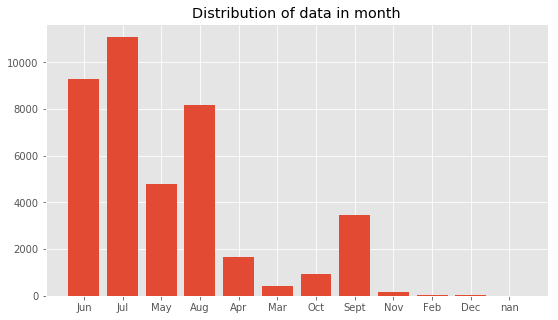

In [161]:
util.plot_cols(Counter(df["x68"]), "month")

In [162]:
# Now we can make these categorical attributs into one-in-hot encoding

In [163]:
df_dummy = pd.get_dummies(df, prefix=["x34","x35","x68","x93"])

In [164]:
df_dummy.head()

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x68_Jul,x68_Jun,x68_Mar,x68_May,x68_Nov,x68_Oct,x68_Sept,x93_america,x93_asia,x93_euorpe
0,10.142889,-15.675620,3.583176,-22.397489,27.221894,-34.110924,-0.072829,-0.544444,0.997601,-2.691778,...,0,1,0,0,0,0,0,0,0,1
1,-52.214630,5.847135,-10.902843,-14.132351,20.588574,36.107322,0.115023,0.276093,-0.699168,-0.972708,...,1,0,0,0,0,0,0,0,1,0
2,67.718500,2.064334,12.394186,-18.667102,47.465504,-50.373658,0.253707,1.068968,2.939713,2.691218,...,1,0,0,0,0,0,0,0,1,0
3,-28.003111,8.565128,-8.592092,5.918960,-3.224154,78.315783,-0.879845,1.176889,-2.414752,0.589646,...,0,0,0,1,0,0,0,0,1,0
4,80.703016,30.736353,-30.101857,-21.201140,-91.946233,-47.469246,-0.646831,-0.578398,0.980849,-1.426112,...,1,0,0,0,0,0,0,0,1,0


In [165]:
df_dummy.shape

(40000, 126)

In [172]:
util.fillna(df_dummy)
df_dummy.shape

(40000, 126)

In [173]:
null_cols = df_dummy.isnull().sum(axis=0).sort_values(ascending=False)
null_cols[null_cols>0]

x96    15
x0     14
x18    14
x55    14
x21    13
x13    13
x69    13
x7     13
x63    13
x62    13
x99    13
x42    12
x65    12
x60    12
x85    12
x94    11
x24    11
x12    11
x17    11
x28    11
x56    11
x51    11
x26    11
x77    10
x48    10
x75    10
x66    10
x89    10
x5     10
x1     10
       ..
x2      6
x49     6
x61     6
x92     6
x8      6
x38     6
x73     6
x20     6
x41     5
x29     5
x45     5
x30     5
x22     5
x64     5
x98     5
x50     5
x83     5
x81     5
x71     4
x32     4
x88     4
x47     4
x70     4
x44     4
x53     4
x14     3
x37     3
x84     3
x91     2
x43     1
Length: 96, dtype: int64

In [174]:
# Creating one-in-hot encoding have added 25 more features to the data
# Now the entire data is numerical, we can determine what subset from the feature will be relevant to a good model
# We can start by checking how much each feature correlates with the the label

In [175]:
df_corr = df_dummy.copy().corr()

In [176]:
df_corr.tail()

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x68_Jul,x68_Jun,x68_Mar,x68_May,x68_Nov,x68_Oct,x68_Sept,x93_america,x93_asia,x93_euorpe
x68_Oct,0.112879,-0.025157,-0.068854,-0.073669,-0.000956,0.014476,-0.004334,-0.000688,0.067641,0.001672,...,-0.095334,-0.084670,-0.015647,-0.056767,-0.009633,1.000000,-0.047416,0.008289,-0.001939,-0.008474
x68_Sept,0.150365,-0.036598,-0.094202,-0.098149,-0.007896,0.006901,0.000032,0.002633,0.089547,-0.001965,...,-0.190745,-0.169408,-0.031306,-0.113579,-0.019273,-0.047416,1.000000,0.005047,-0.002005,-0.003554
x93_america,-0.002837,0.004870,-0.005386,-0.000074,-0.008254,0.002762,0.006983,0.005911,-0.006394,0.008608,...,-0.009620,-0.001175,-0.000985,0.000178,-0.000344,0.008289,0.005047,1.000000,-0.810009,-0.056526
x93_asia,0.002733,-0.005581,0.003540,-0.001718,0.006708,-0.000033,-0.001783,-0.005009,0.005605,-0.008206,...,0.011324,-0.001809,0.002294,-0.000594,0.001139,-0.001939,-0.002005,-0.810009,1.000000,-0.538225
x93_euorpe,0.000018,0.002518,0.001768,0.003200,0.000079,-0.003590,-0.007008,0.000188,-0.000856,0.001120,...,-0.005497,0.004977,-0.002402,0.000690,-0.001390,-0.008474,-0.003554,-0.056526,-0.538225,1.000000


In [177]:
# There are multiple features in the data and we will not create 
# individual vizualization to see the correlation. To understand the 
# correlation, we will select correlation value of each feature with the label 

In [178]:
df_y = df_corr.loc[["y"],:]

In [179]:
df_y[df_y.iloc[-1,:].sort_values(ascending=False).index]

,y,x58,x97,x1,x99,x79,x63,x72,x69,x78,...,x96,x21,x50,x66,x3,x22,x70,x41,x37,x75
y,1.0,0.18666,0.184344,0.101217,0.098397,0.09582,0.095792,0.095313,0.095173,0.094825,...,-0.091515,-0.092892,-0.093171,-0.096199,-0.096704,-0.097655,-0.104042,-0.181519,-0.195297,-0.2105


In [180]:
df_y[df_y.iloc[-1,:].sort_values(ascending=True).index]

,x75,x37,x41,x70,x22,x3,x66,x50,x21,x96,...,x78,x69,x72,x63,x79,x99,x1,x97,x58,y
y,-0.2105,-0.195297,-0.181519,-0.104042,-0.097655,-0.096704,-0.096199,-0.093171,-0.092892,-0.091515,...,0.094825,0.095173,0.095313,0.095792,0.09582,0.098397,0.101217,0.184344,0.18666,1.0


In [181]:
# Generally there is a week correlation both positively and negatively. 
# The feature with the most correction correlation x75 has a correlation value 
# of -0.2105 which is a weak correlation value. But 

#### Lets try resampling the data to balance the dataset

The data is not a large dataset, undersampling the data will lead to loss of information. The better approach will be oversampling the minority class to the same amount of the majority class. A good technique for this is using SMOTE algorithm to generate synthetic data.

In [182]:
df_dummy.dropna(inplace=True)

In [234]:
data = df_dummy.copy()
y = data.pop("y")
X = data.values

In [235]:
# Now the data is balanced, the a new model can be attempted

In [236]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

In [237]:
print("Original dataset shape {}".format(dict(Counter(y_train))))

Original dataset shape {1: 5915, 0: 23509}


In [238]:
sm = SMOTE(random_state=1)

In [239]:
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

In [240]:
print("Resampled dataset shape {}".format(dict(Counter(y_train_res))))

Resampled dataset shape {1: 23509, 0: 23509}


In [275]:
# rfc = RandomForestClassifier()

rfc = Pipeline([('scaler', StandardScaler()),
                        ('rfc', RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                                                        max_depth=20, max_features=5, max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0, min_impurity_split=None,
                                                        min_samples_leaf=1, min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
                                                        oob_score=False, random_state=None, verbose=0,
                                                        warm_start=False))])
rfc.fit(X_train_res, y_train_res)

Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('rfc', RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=20, max_features=5, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            ...obs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False))])

In [276]:
y_pred = rfc.predict(X_test)

In [277]:

precision, recall, accuracy, matrix = util.metric(y_test, y_pred)

In [278]:
# Confusion matrix
matrix

array([[1037,   62],
       [ 933, 7776]])

In [279]:
print("Recall: {}".format(round(recall,2)))
print("Precision: {}".format(round(precision,2)))

Recall: 0.53
Precision: 0.94


In [280]:
#predicted probabilities
scores = rfc.predict_proba(X_test)

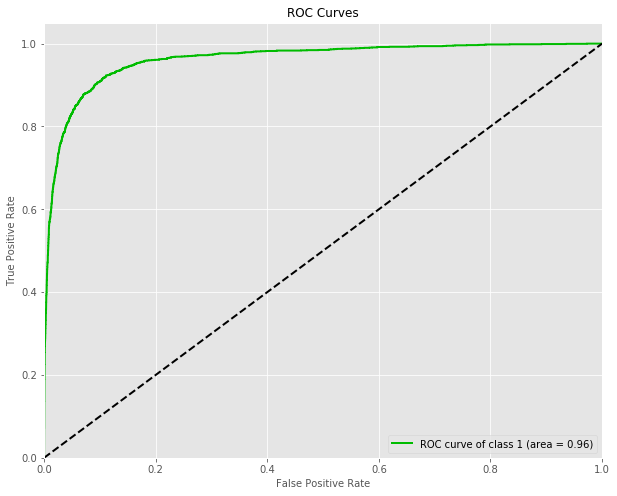

In [281]:
_=skplt.metrics.plot_roc(y_test, scores, 
                         classes_to_plot=[1], plot_micro=False, 
                         plot_macro=False, figsize=(10,8))

In [84]:
# We used all features in the dataset but not all the features are 
# relevant to build a good model, some unimportant features only 
# contribute noise to the data, therefore we will use only the 
# important features that contributed to the improved outcome of the 
# model to build a new model

In [282]:
estimators = [('scaler', StandardScaler()),
             ('gb', GradientBoostingClassifier(criterion='friedman_mse',
                                              learning_rate=0.8,
                                              n_estimators=300,
                                              max_features='log2',
                                              max_depth=5))]

pipeline = Pipeline(estimators)
pipeline.fit(X_train_res, y_train_res)

Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('gb', GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.8, loss='deviance', max_depth=5,
              max_features='log2', max_leaf_nodes=None,
              min_impurity_decrea...    subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False))])

In [283]:
y_pred_gb = pipeline.predict(X_test)

In [284]:

precision_gb, recall_gb, accuracy_gb, matrix_gb = util.metric(y_test, y_pred_gb)

In [285]:
# Confusion matrix
matrix_gb

array([[1667,  176],
       [ 303, 7662]])

In [286]:
print("Recall: {}".format(round(recall_gb,2)))
print("Precision: {}".format(round(precision_gb,2)))

Recall: 0.85
Precision: 0.9


In [303]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_train_res)

In [304]:
gb = GradientBoostingClassifier()
gb.fit(X_scaled, y_train_res)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              n_iter_no_change=None, presort='auto', random_state=None,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [305]:
X_test_scaled = scaler.transform(X_test)
y_pred_gb1 = gb.predict(X_test_scaled)

In [306]:
precision_gb1, recall_gb1, accuracy_gb1, matrix_gb1 = util.metric(y_test, y_pred_gb1)

In [307]:
# Confusion matrix
matrix_gb1

array([[1310,  277],
       [ 660, 7561]])

In [308]:
print("Recall: {}".format(round(recall_gb1,2)))
print("Precision: {}".format(round(precision_gb1,2)))

Recall: 0.66
Precision: 0.83


In [324]:
gb2 = GradientBoostingClassifier()

param_grid2 = {"learning_rate": [0.6,0.8],
               "n_estimators":[200, 300, 400, 500, 600],
                "max_depth":[2,3,5],
                "max_features":["log2", "sqrt",],
                "criterion": ["friedman_mse"]}

# run grid search
grid_search2 = GridSearchCV(gb2, param_grid=param_grid2, n_jobs=-1)

grid_search2.fit(X_scaled, y_train_res)

/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_sampl...      subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'learning_rate': [0.6, 0.8], 'n_estimators': [200, 300, 400, 500, 600], 'max_depth': [2, 3, 5], 'max_features': ['log2', 'sqrt'], 'criterion': ['friedman_mse']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [325]:
gb3 = grid_search2.best_estimator_
gb3

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.8, loss='deviance', max_depth=5,
              max_features='log2', max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=600,
              n_iter_no_change=None, presort='auto', random_state=None,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [332]:
y_pred_gb3 = gb3.predict(X_test_scaled)

In [333]:
precision_gb3, recall_gb3, accuracy_gb3, matrix_gb3 = util.metric(y_test, y_pred_gb3)

In [334]:
print("Recall: {}".format(round(recall_gb3,2)))
print("Precision: {}".format(round(precision_gb3,2)))

Recall: 0.86
Precision: 0.93
